In [ ]:
from numpy import *
from scipy import integrate
from scipy.interpolate import interp1d as lin_interpol
from scipy.optimize import curve_fit
from scipy.optimize import root_scalar
from scipy.stats import linregress as linreg
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy.stats
import sklearn.decomposition
import tensorflow as tf
import copy
import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

pd.set_option('display.max_columns', None)

In [ ]:
dir = 'drive/MyDrive/Colab Notebooks/Superconductors/'

In [ ]:
data1 = pd.read_csv(dir + 'train.csv', delimiter=';')
data1 = data1.drop(columns='critical_temp')
data2 = pd.read_csv(dir + 'unique_m.csv', delimiter=';')
data2 = data2.loc[:, (data2 != 0).any(axis=0)]
y = data2['critical_temp']
ind = data2['material']

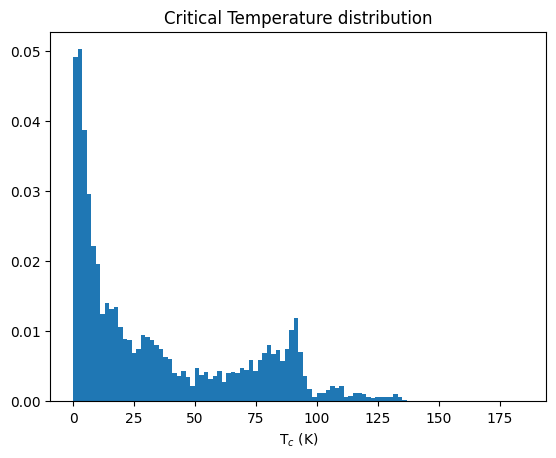

In [ ]:
x = array(sum(data2.iloc[:,:-2],axis=1))

plt.hist(data2.iloc[:,-2], bins = 100, density = True)
plt.title('Critical Temperature distribution')
plt.xlabel('T$_c$ (K)')
plt.show()

In [ ]:
data = data1.join(data2)
data.index = ind
data = data.iloc[:,:-2]

index_nonduplicates = ~data.index.duplicated(keep='first')
data = data[index_nonduplicates]
y = y[index_nonduplicates]

data.to_csv(dir + 'superconductor_data.csv', sep = ';', index = True)
data2.to_csv(dir + 'superconductor_data2.csv', sep = ';', index = False)

data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ba0.2La1.8Cu1O4,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.250000,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,1.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ba0.1La1.9Ag0.1Cu0.9O4,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.000000,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(data, y, train_size = 0.8)
materials_train = x_train.index
materials_test = x_test.index
x_train

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Hf0.6V2Zr0.4,3,106.885167,81.822200,93.957527,70.748702,0.975986,1.010211,127.54850,23.534800,53.236010,50.164366,628.333333,636.400000,627.165041,635.618824,1.096779,0.844354,84.5,345.440000,37.774801,30.766865,195.000000,183.066667,194.226681,182.302393,1.094732,0.916267,37,86.533333,16.990193,17.074217,8643.666667,7603.466667,8090.132857,7200.280972,1.029913,0.949572,7200.000,3205.200000,3303.654576,2856.395884,32.066667,40.713333,14.931824,24.947748,0.757728,0.446490,50.60,34.433333,21.959103,19.860744,23.100000,23.100000,23.026686,23.061834,1.095423,0.864692,4.500,12.400000,1.849324,1.341641,25.666667,28.333333,25.406165,28.064054,1.088139,0.765952,8.00000,17.600000,3.771236,3.771236,4.333333,4.666667,4.308869,4.641589,1.092831,0.790559,1,2.800000,0.471405,0.471405,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
La2Cu1O4.065,3,72.816957,57.522222,52.075936,35.858677,0.838545,0.843418,122.90607,30.327663,50.602625,53.591995,866.400000,1014.147417,808.929244,942.897599,1.029822,0.740181,772.0,650.070984,326.649119,353.585989,129.333333,103.343241,110.717078,83.471917,0.972142,1.008632,147,34.677990,61.026406,66.227634,5035.809667,3008.890146,428.526415,52.616029,0.676602,0.683135,8958.571,1739.022097,3740.622989,3605.960086,103.966667,112.974168,94.568481,103.087048,1.017533,0.776292,93.00,67.977707,39.603479,40.606986,6.540667,3.765383,2.636260,1.019374,0.685215,0.817575,12.878,1.726478,5.260175,4.623427,137.675527,60.312533,5.170344,0.598657,0.140516,0.232095,399.97342,56.601833,185.567013,138.047423,2.333333,2.283086,2.289428,2.243256,1.078992,0.972016,1,0.867657,0.471405,0.450498,0.0,0.0,0.0,0.0,0.0,0.0,4.0650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
x_train.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
count,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.00000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000
mean,4.233411,88.624957,74.013853,72.370762,59.733655,1.198659,1.078187,116.707875,34.979089,44.720656,41.296098,766.388555,866.402129,735.

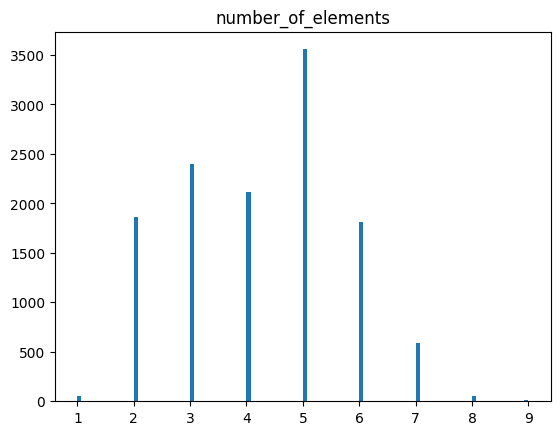

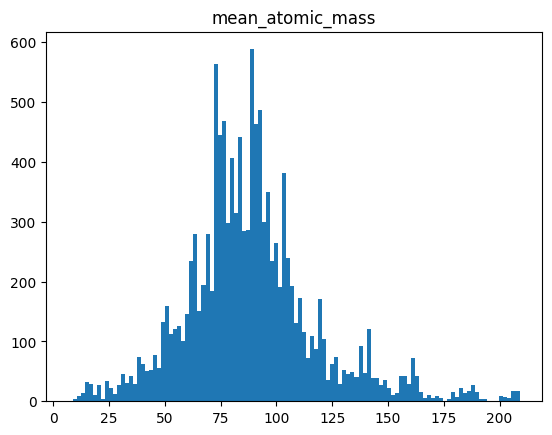

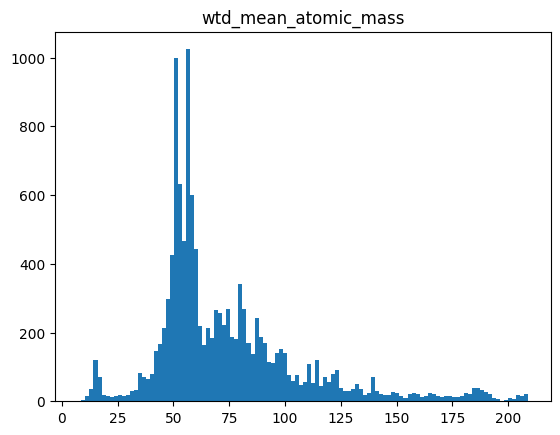

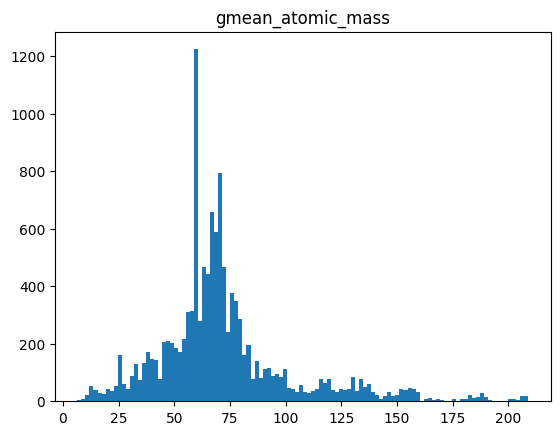

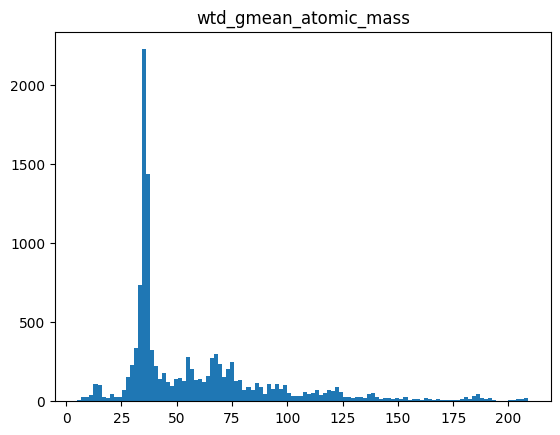

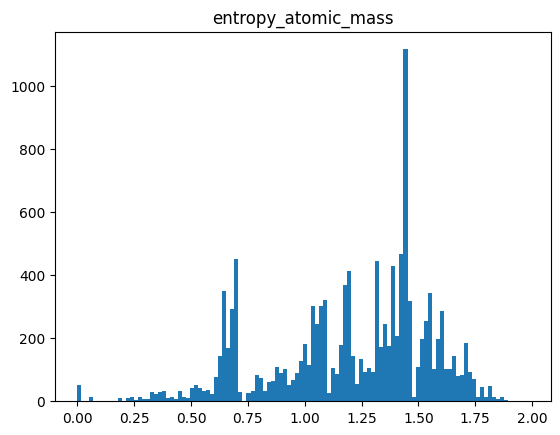

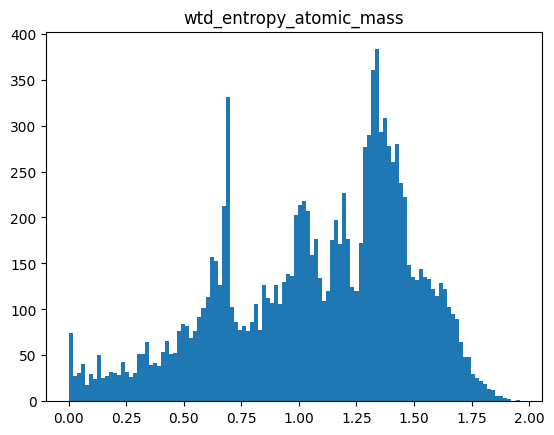

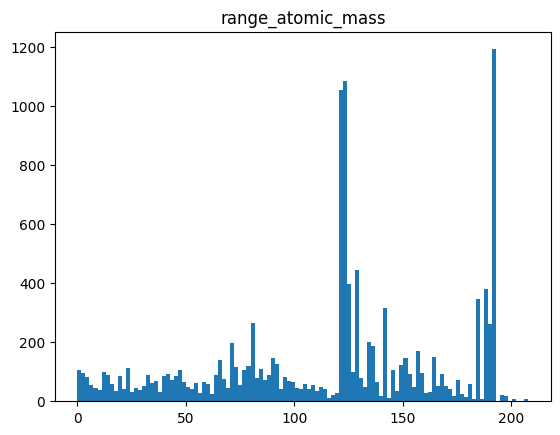

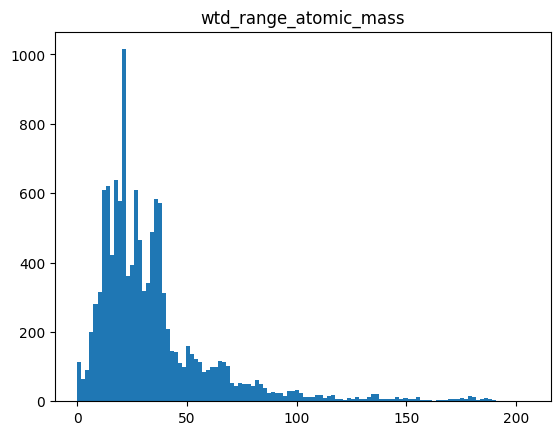

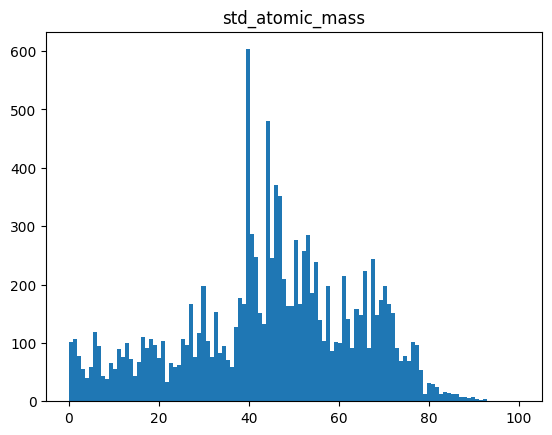

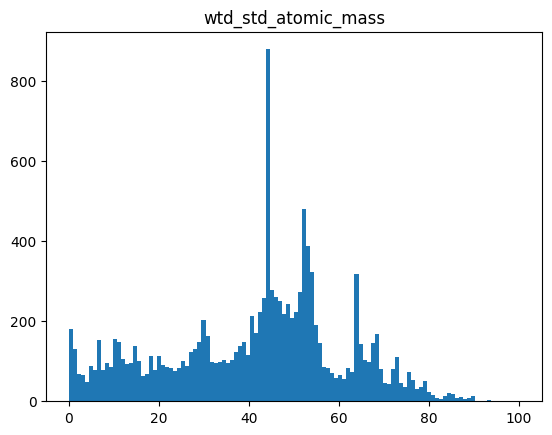

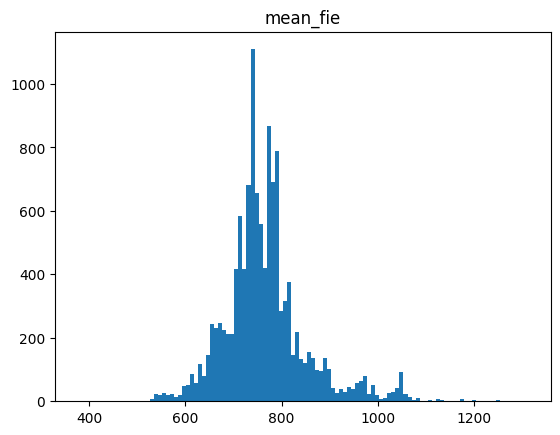

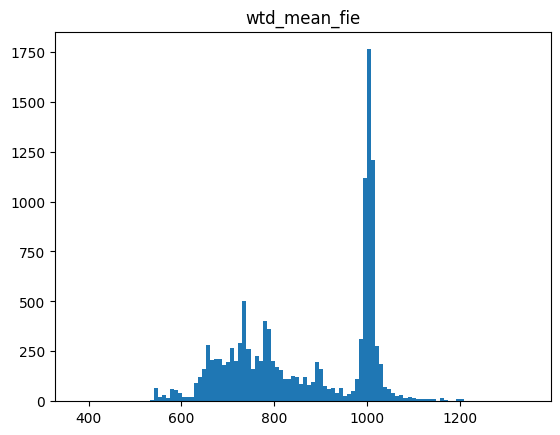

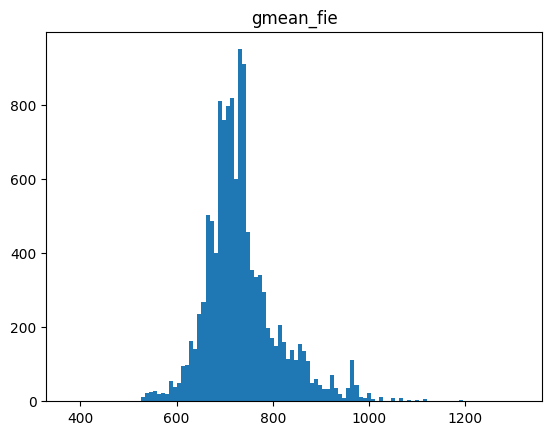

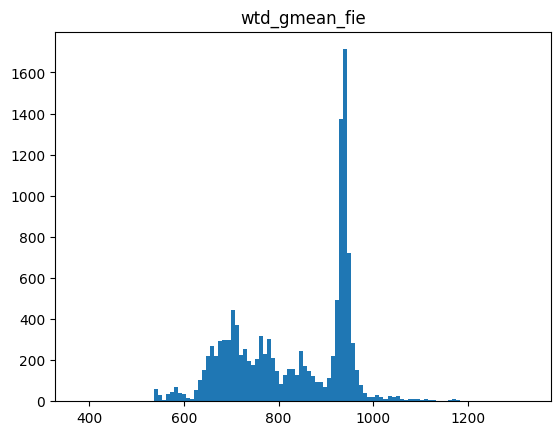

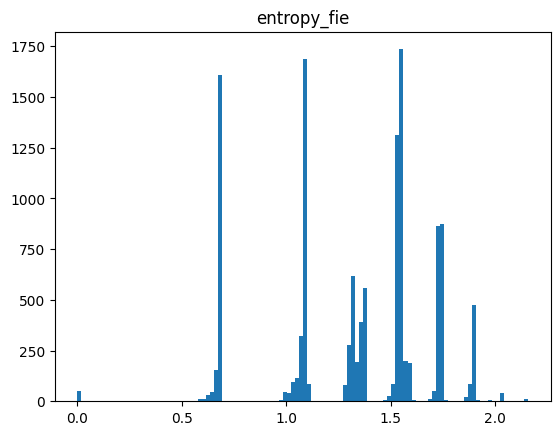

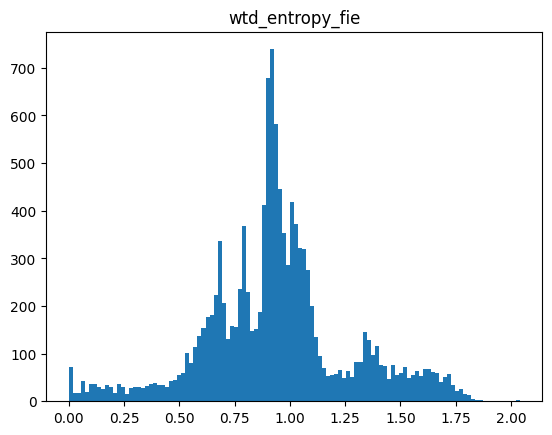

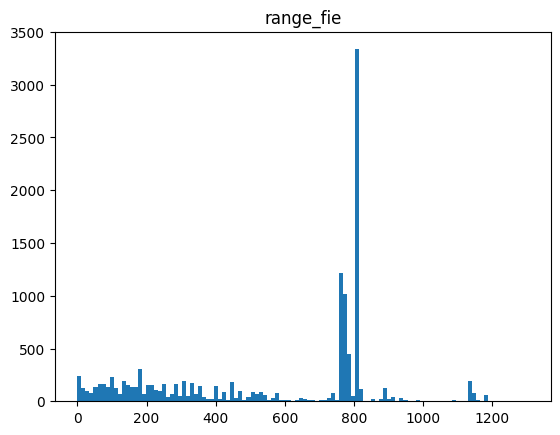

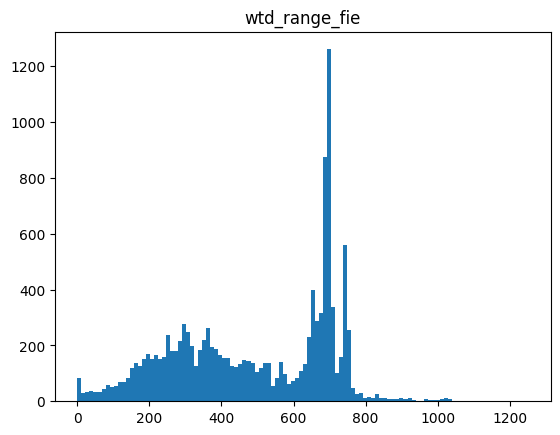

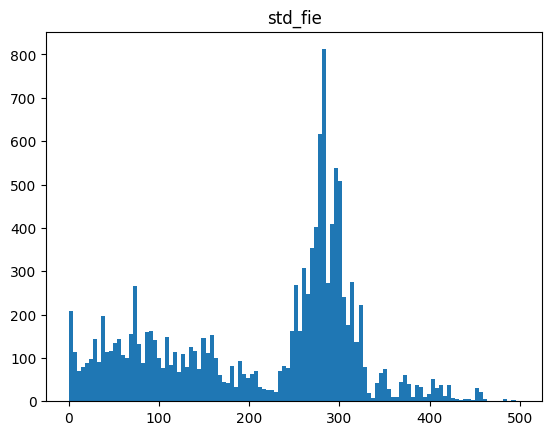

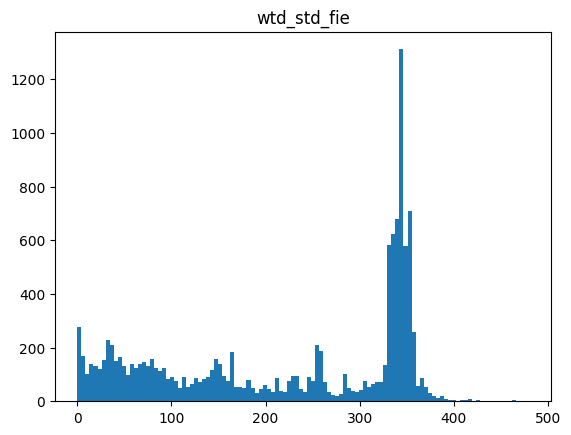

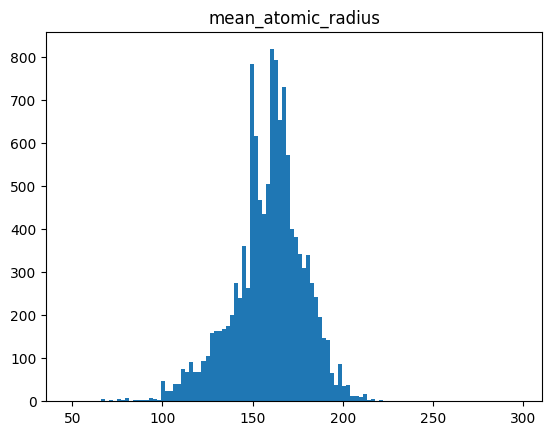

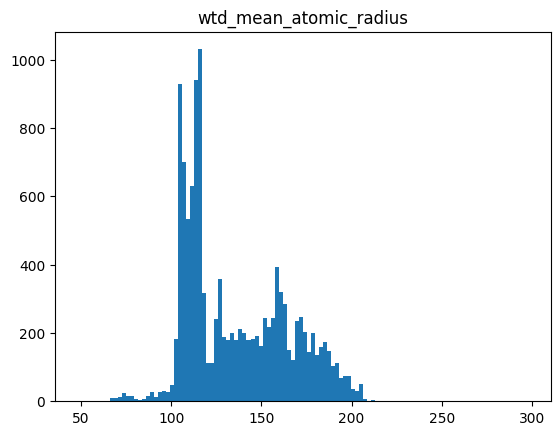

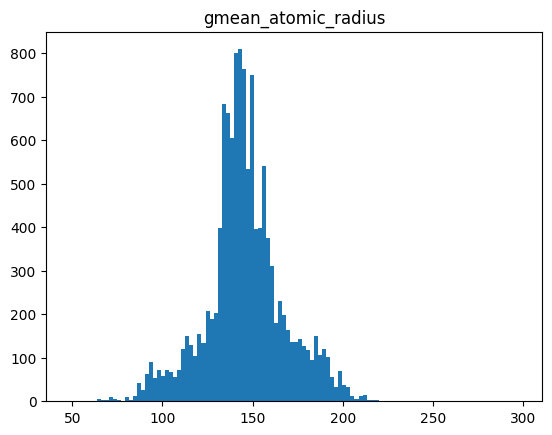

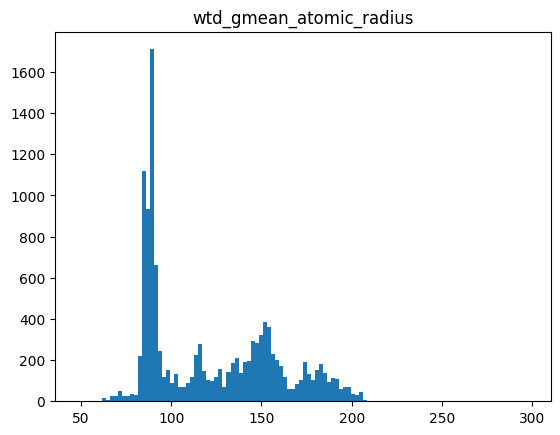

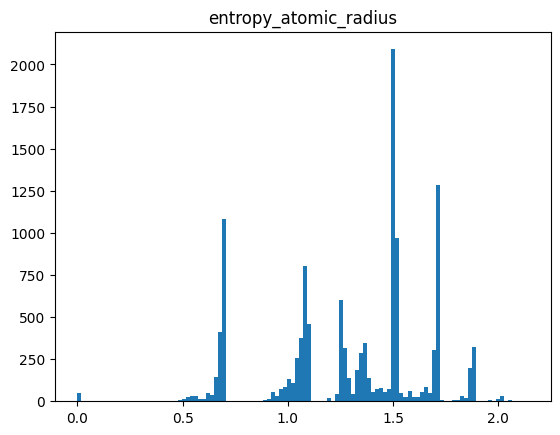

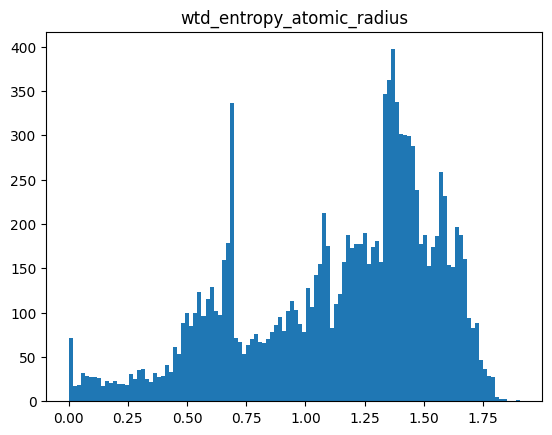

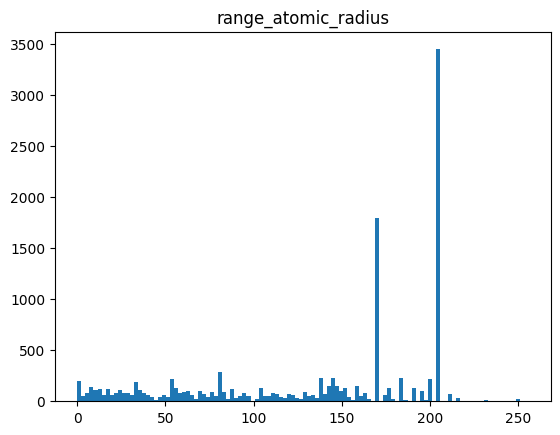

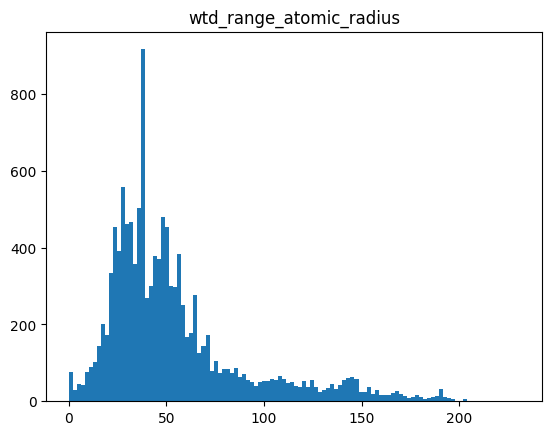

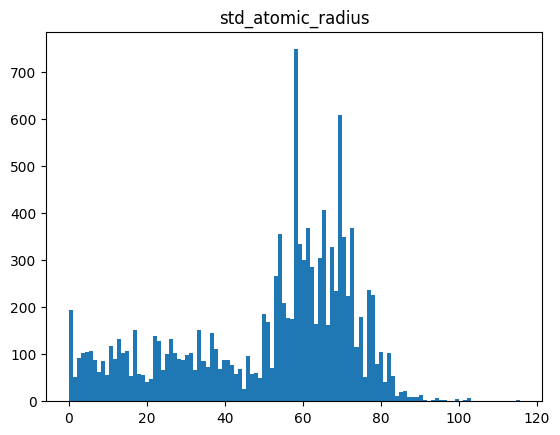

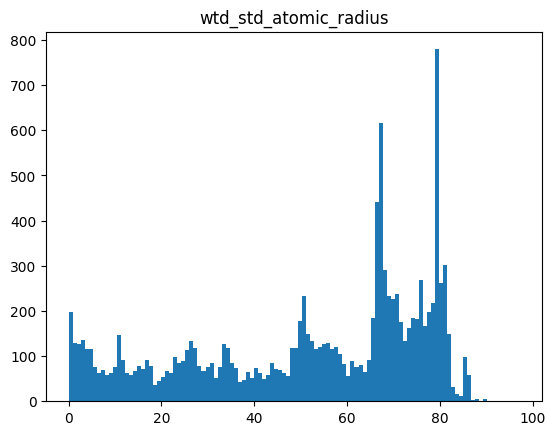

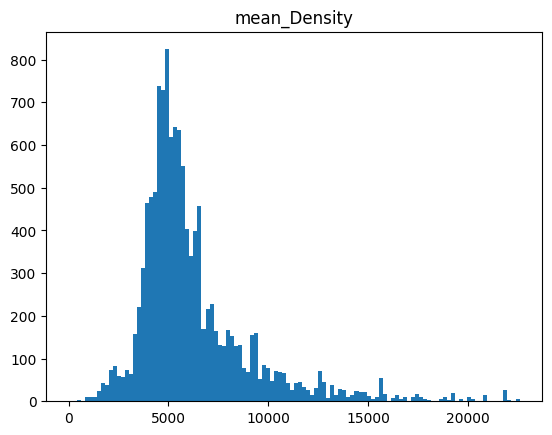

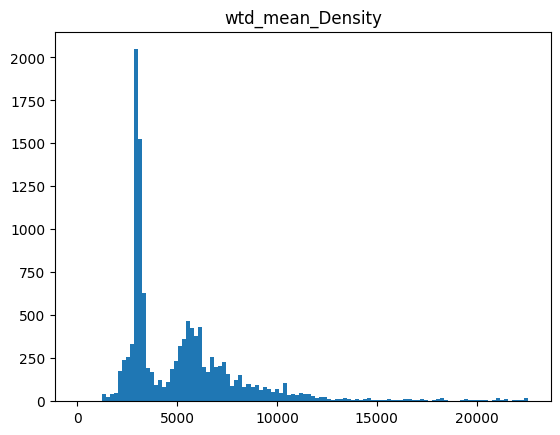

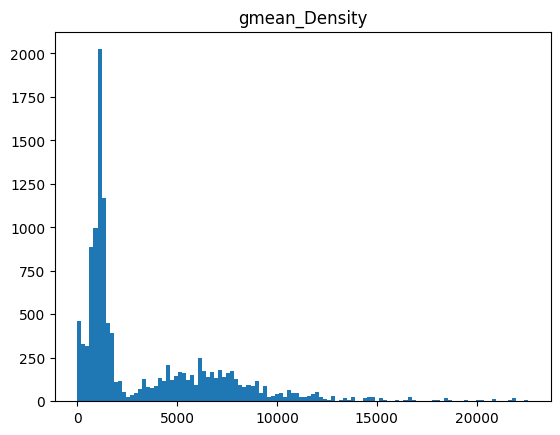

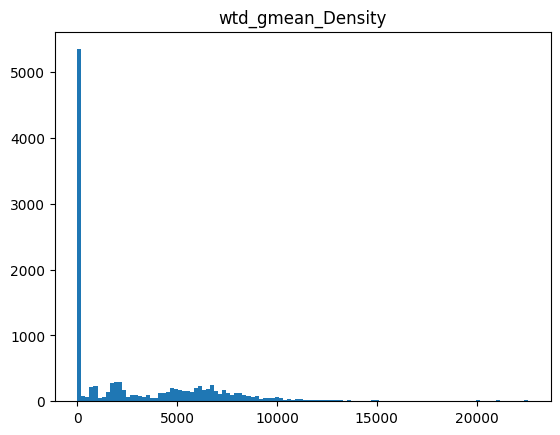

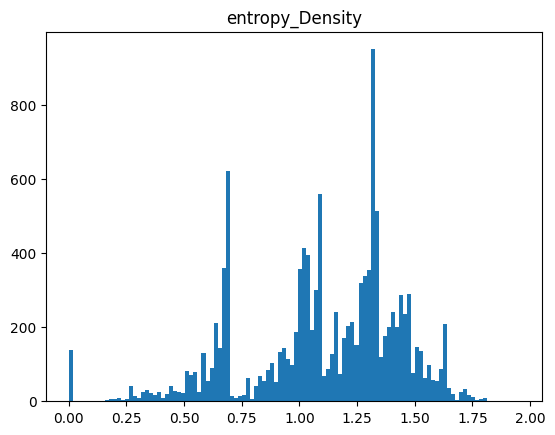

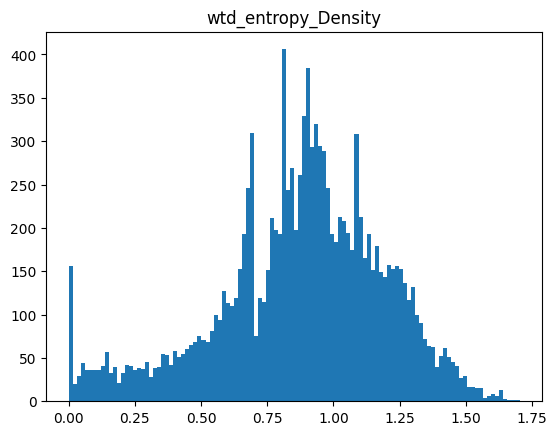

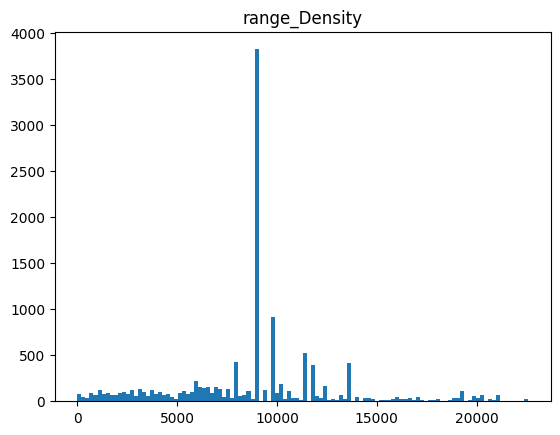

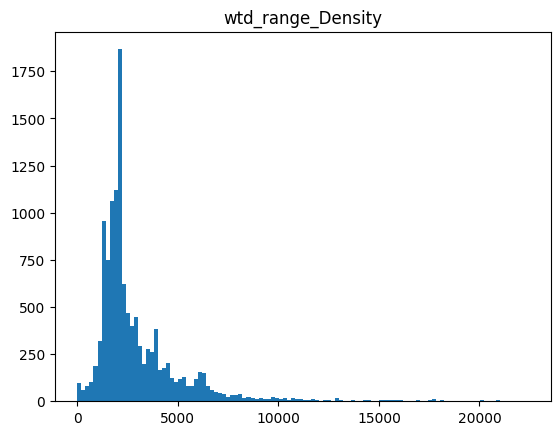

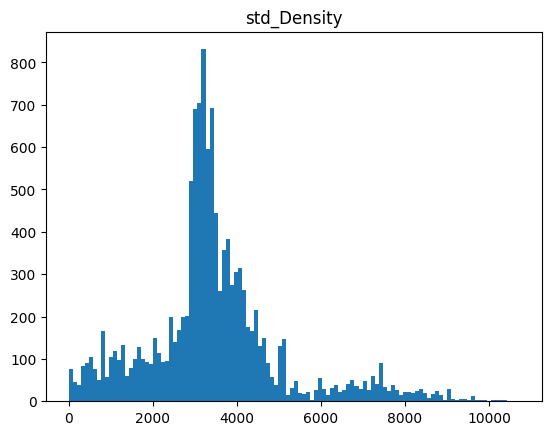

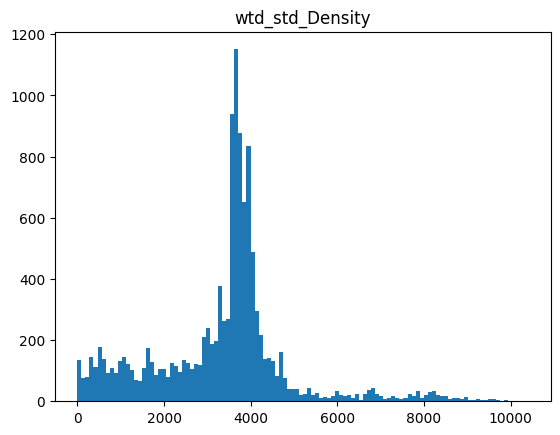

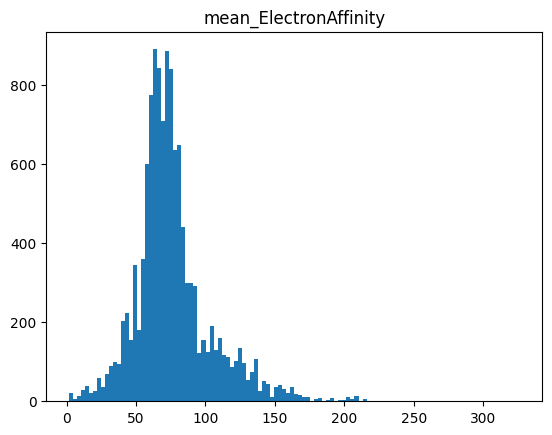

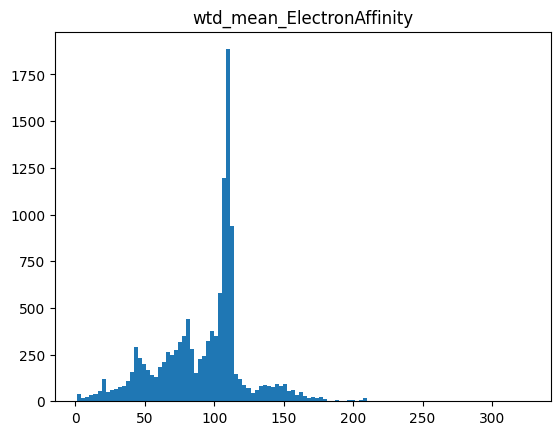

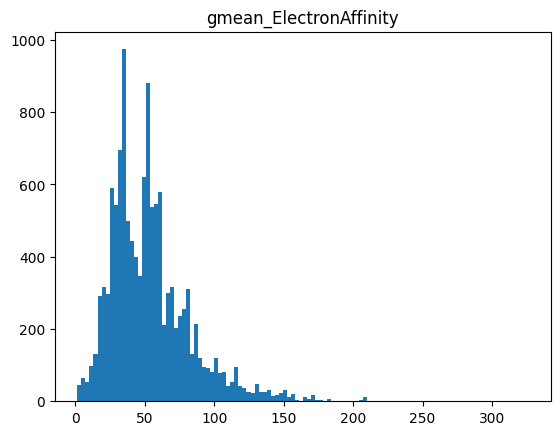

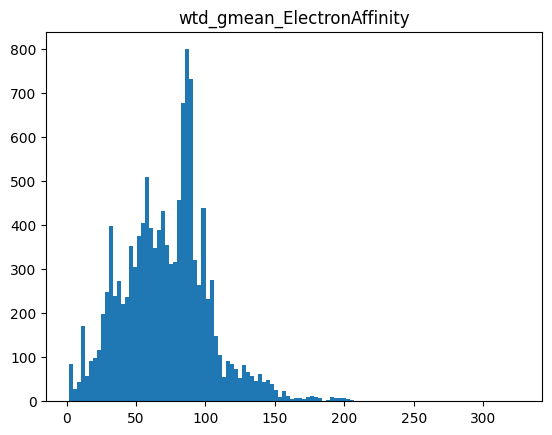

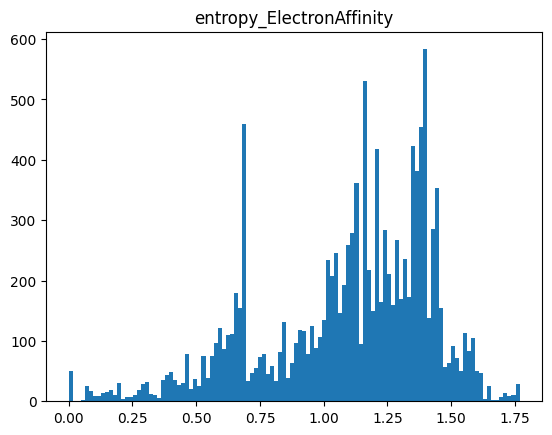

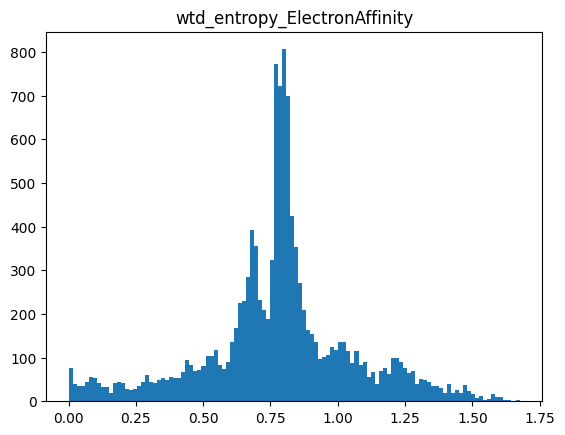

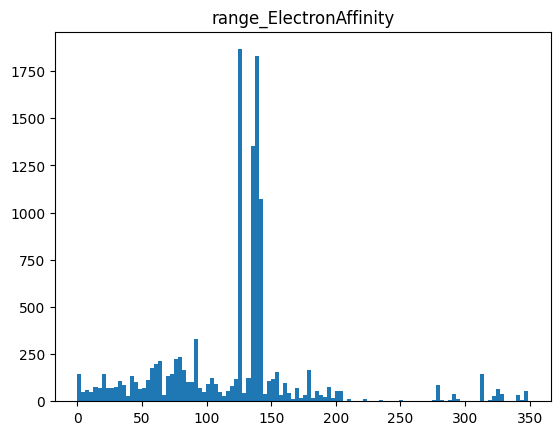

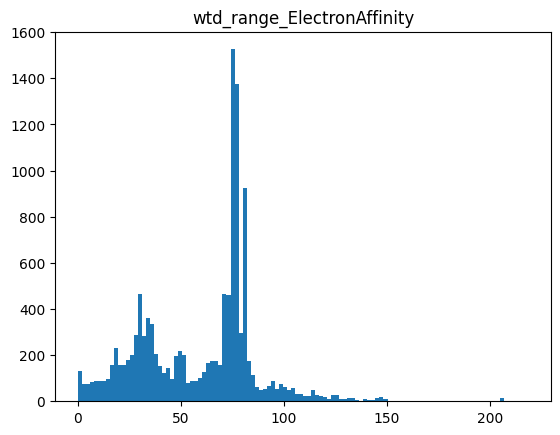

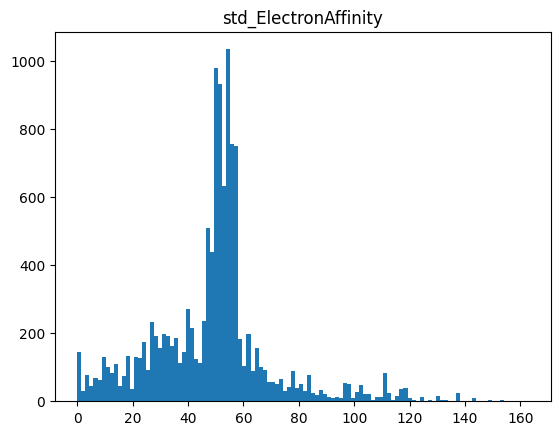

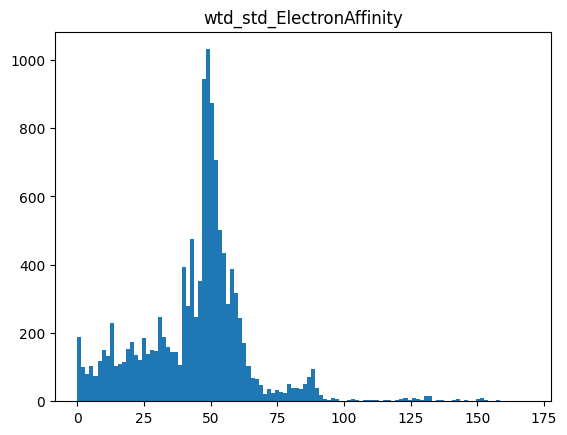

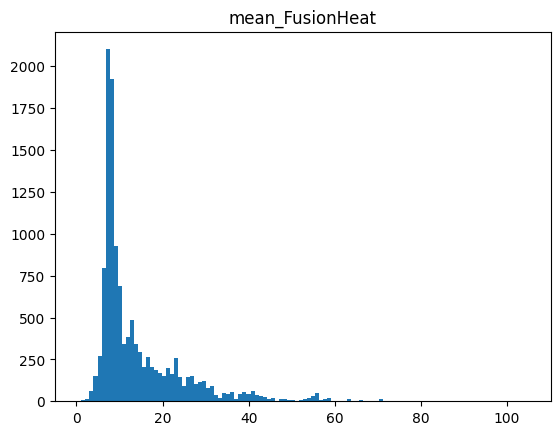

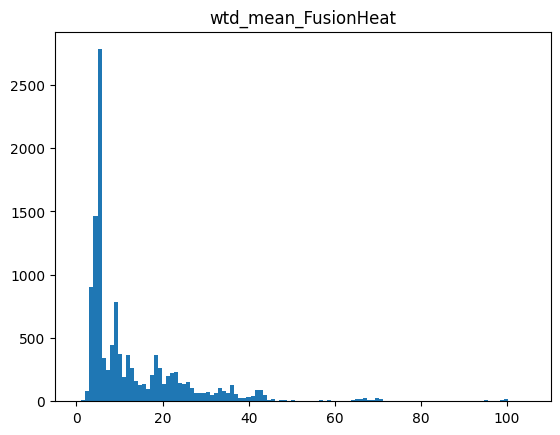

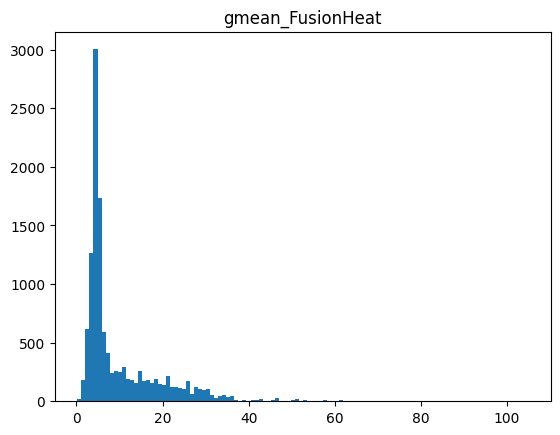

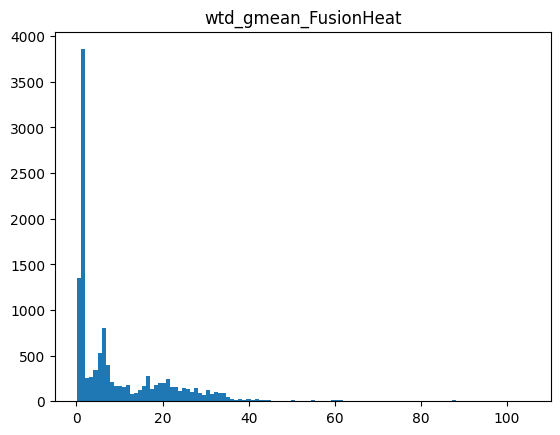

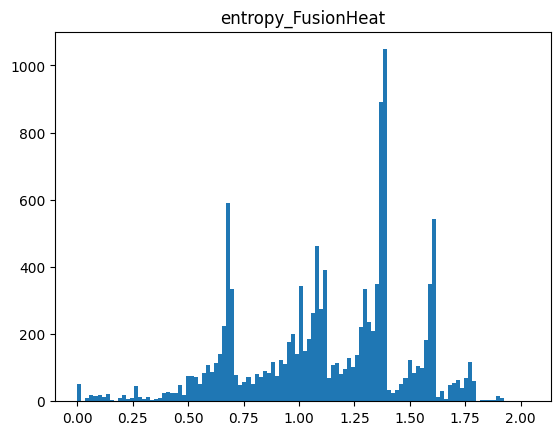

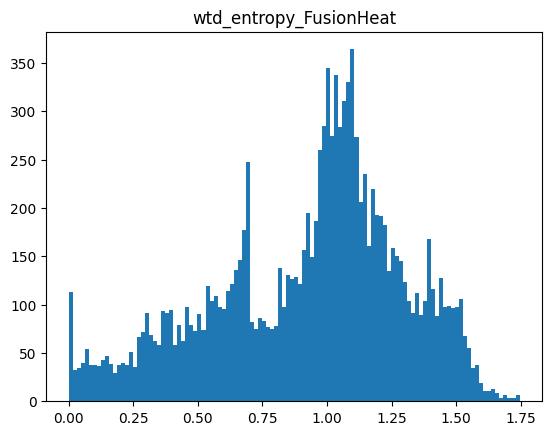

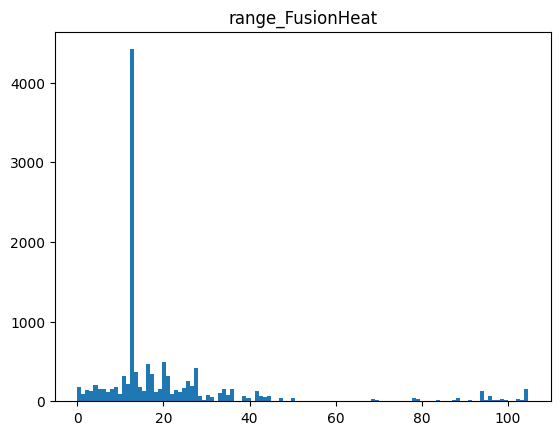

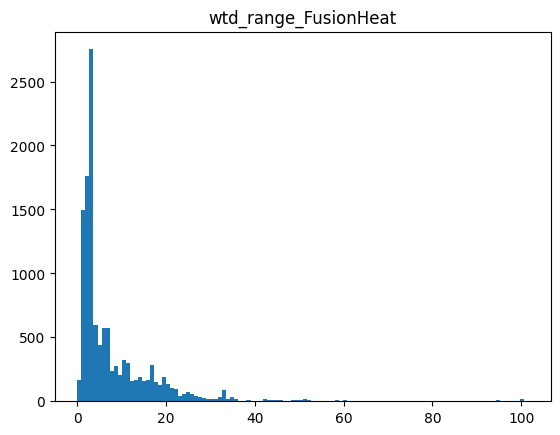

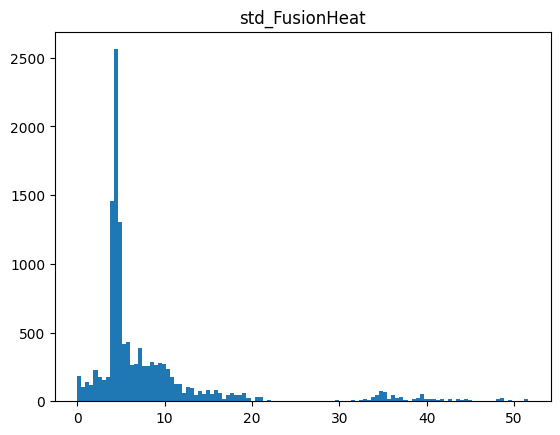

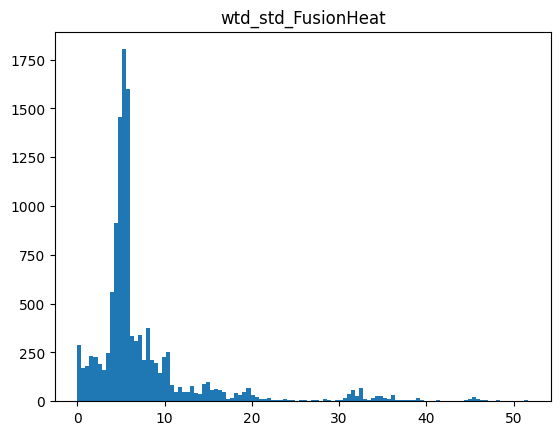

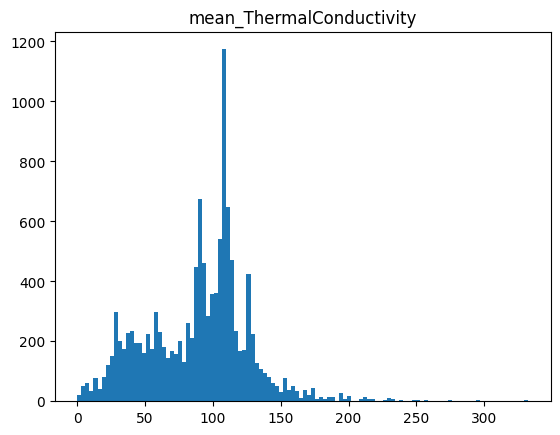

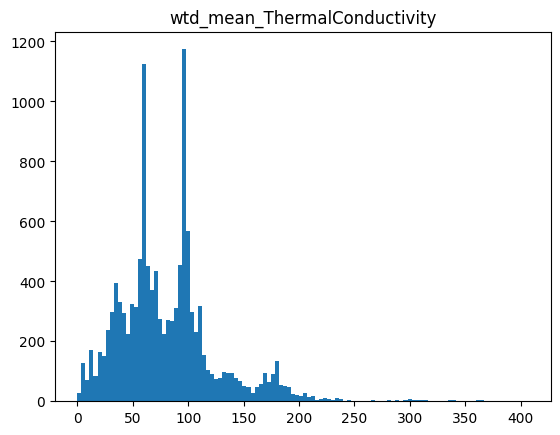

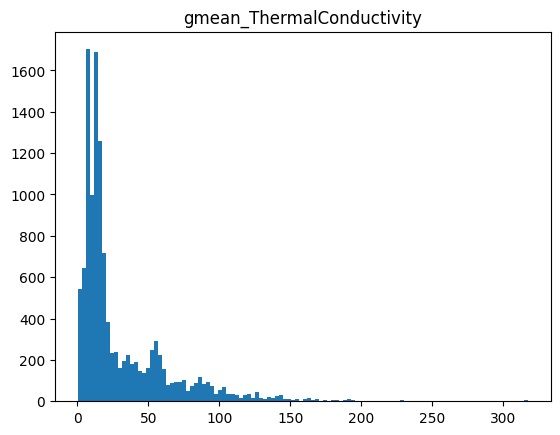

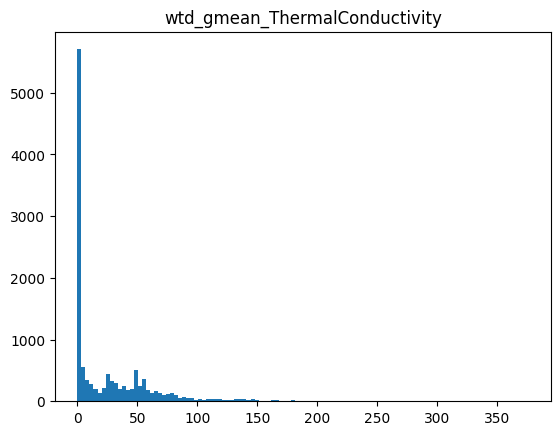

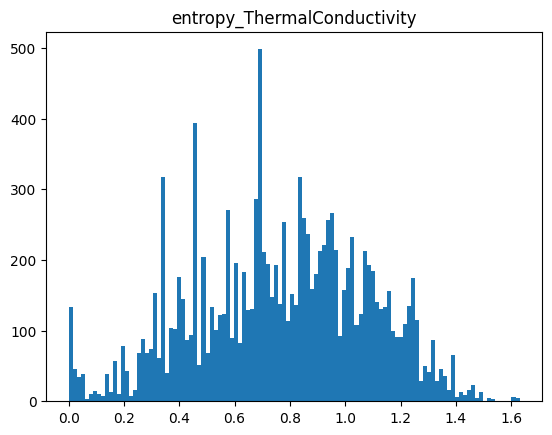

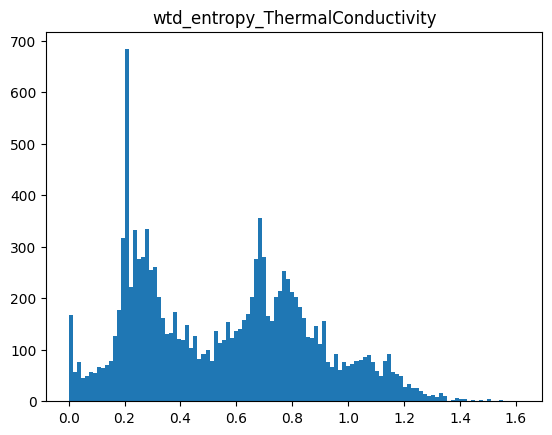

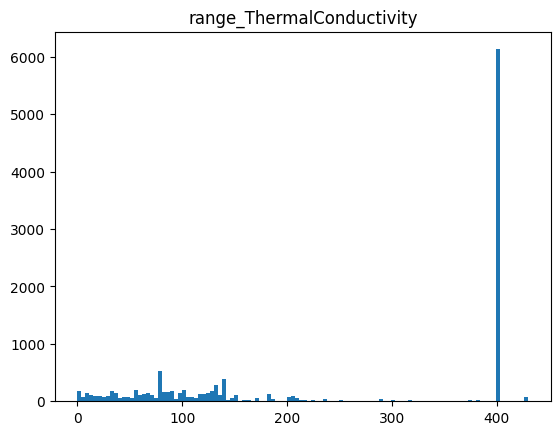

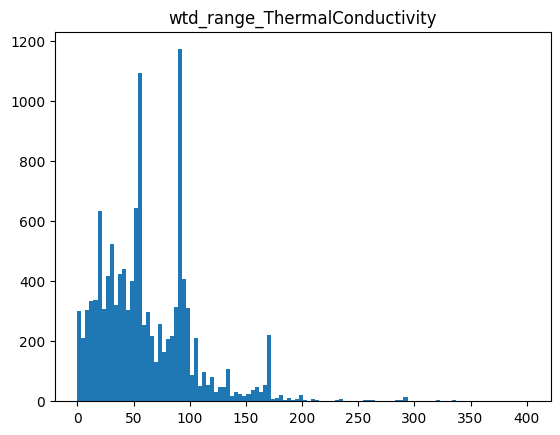

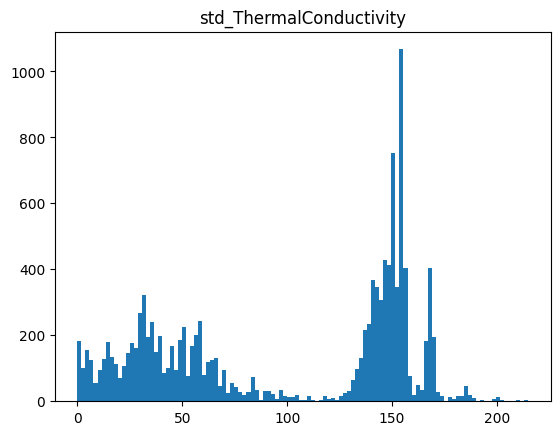

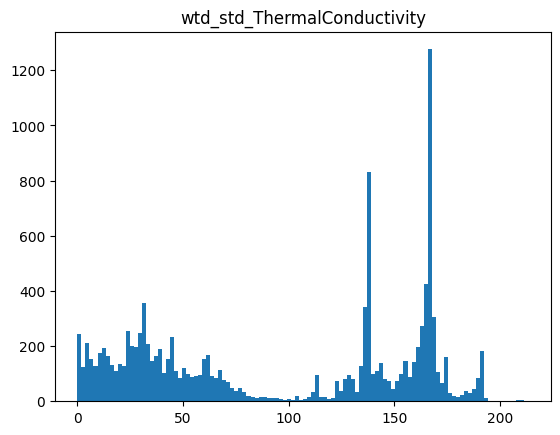

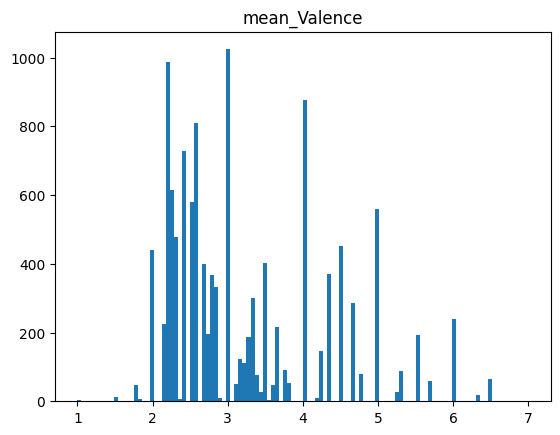

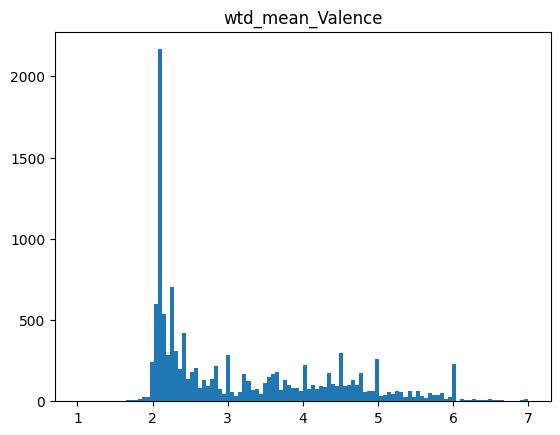

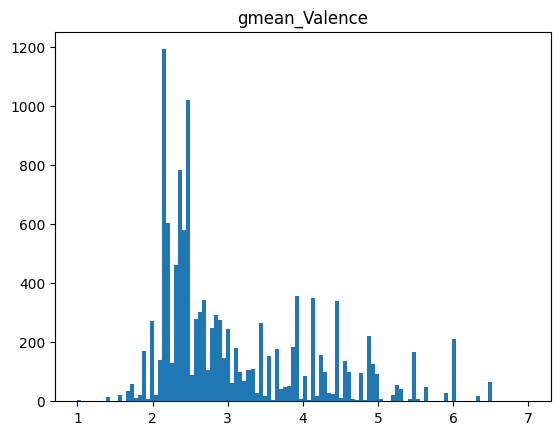

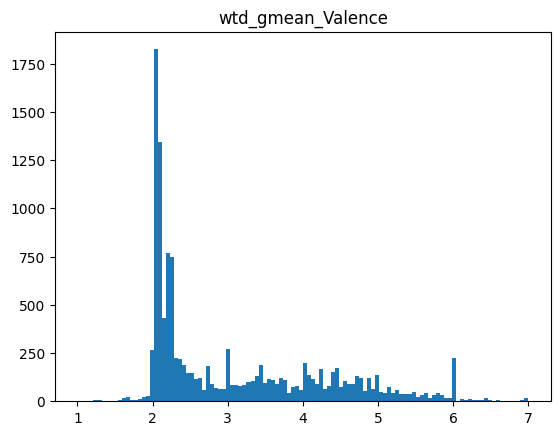

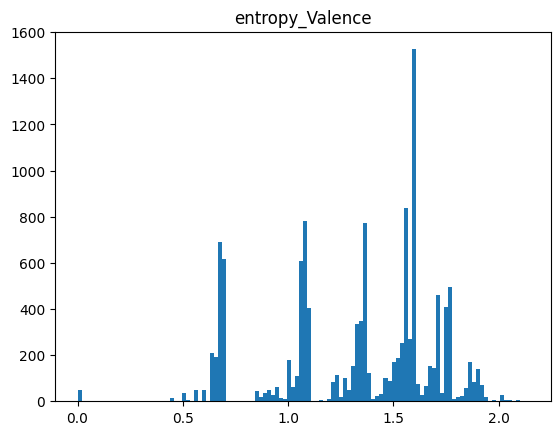

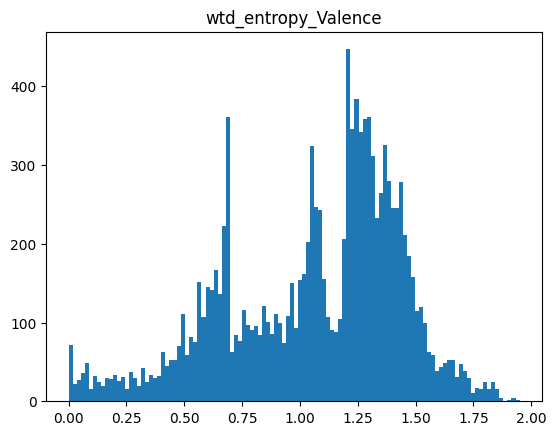

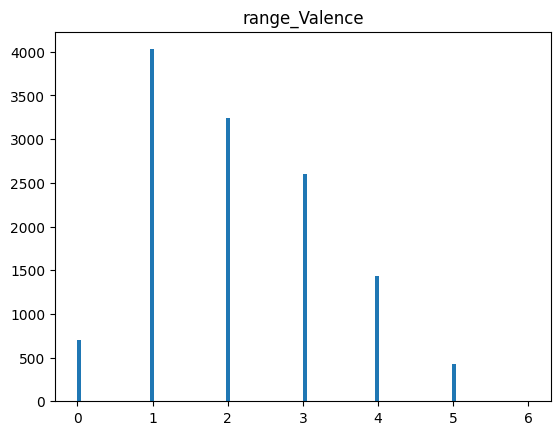

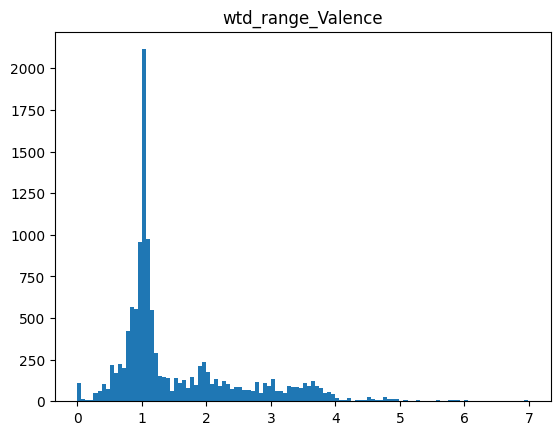

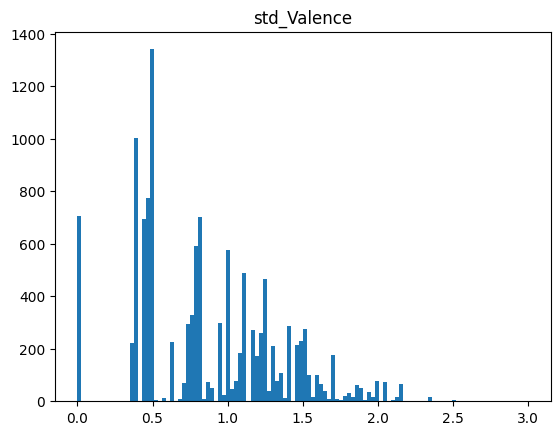

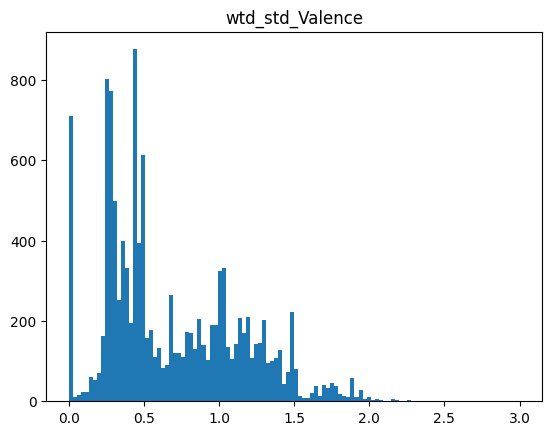

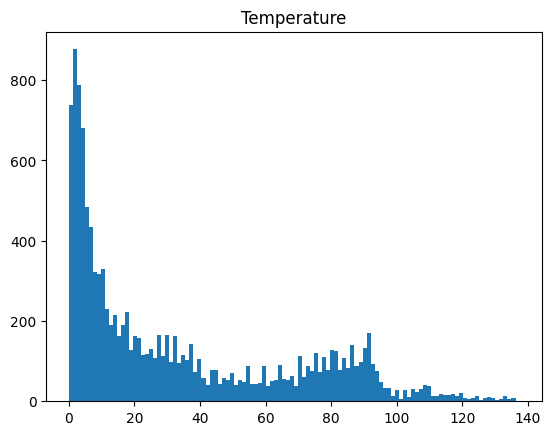

In [ ]:
n = len(x_train)
bins = int(round(sqrt(n)))
for param in data1.columns:
  plt.hist(x_train[param], bins = bins)
  plt.title(param)
  plt.show()

plt.hist(y_train, bins = bins)
plt.title('Temperature')
plt.show()

In [ ]:
x_train, x_test = array(x_train), array(x_test)

stdscaler = StandardScaler()
xtrain1_std = stdscaler.fit(x_train[:,:81]).transform(x_train[:,:81])
xtest1_std = stdscaler.transform(x_test[:,:81])

pca = sklearn.decomposition.PCA(40)
pc_train = pca.fit(xtrain1_std).transform(xtrain1_std)
pc_test = pca.transform(xtest1_std)

x_train = hstack((x_train[:,:81],pc_train,x_train[:,81:]))
x_test = hstack((x_test[:,:81],pc_test,x_test[:,81:]))

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit(x_train).transform(x_train)
x_test = scaler.transform(x_test)

'''
y_train = array(y_train).reshape(-1, 1)
y_test = array(y_test).reshape(-1, 1)
scaler_temp = MinMaxScaler()
scaler_temp.fit(y_train).transform(y_train)
scaler_temp.transform(y_test)
'''


'\ny_train = array(y_train).reshape(-1, 1)\ny_test = array(y_test).reshape(-1, 1)\nscaler_temp = MinMaxScaler()\nscaler_temp.fit(y_train).transform(y_train)\nscaler_temp.transform(y_test)\n'

### Neural Network com Scaler Uniforme nas Temperaturas

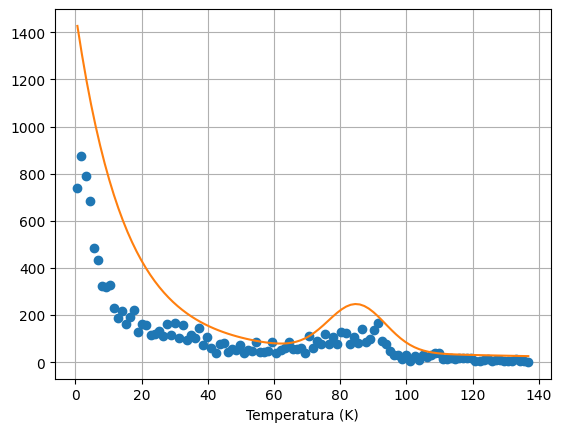

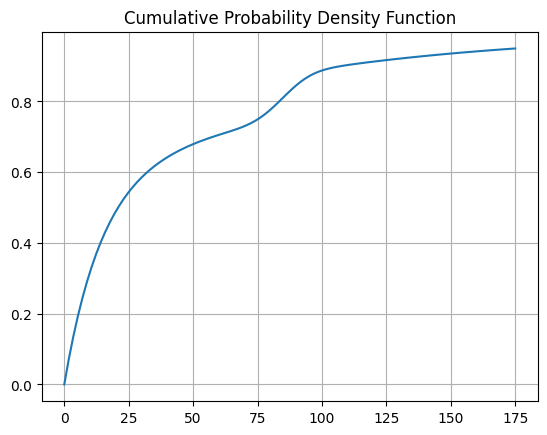

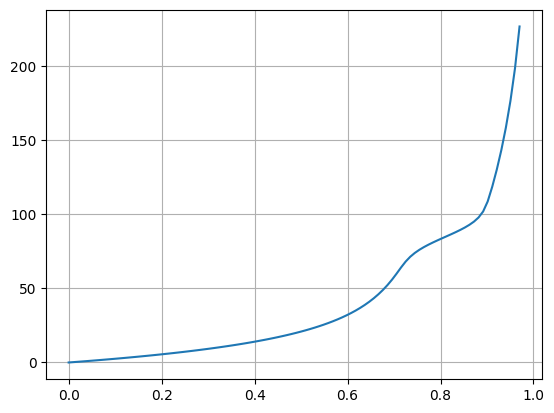

In [ ]:
#Scaler para temperaturas

def scatter_hist(x, bins = None):
  if bins == None:
    bins = round(sqrt(len(x)))
  xmin = min(x)
  xmax = max(x)+std(x)/1000
  copy = [int((i-xmin)/(xmax-xmin)*bins) for i in x]
  bin = zeros(bins)
  for i in copy:
    bin[i] += 1
  deltax = (xmax-xmin)/bins
  xaxis = linspace(xmin+deltax/2,xmax-deltax/2,bins)
  return xaxis, array(bin)
'''
def curve(x,a,b,C):
  return C*exp(-a*x)*(0.5*cos(b*x)+1)
'''
def curve(x):
  C1,C2,a,mu,var = 1385,200,1/14.5,85,150
  return C1*exp(-a*x)+C2*exp(-pow(x-mu,2)/var)+100*exp(-0.01*x)

x_hist_temp, y_hist_temp = scatter_hist(y_train)
#x_hist_temp = x_hist_temp
#C1,C2,a,mu,var = curve_fit(curve,x_hist_temp.flatten(),y_hist_temp.flatten(),p0=[1200,200,1/14,85,150])[0]
#print('a:', a)
#print('b:', b)
#print('C:', C,'\n')

plt.plot(x_hist_temp, y_hist_temp, 'o')
plt.plot(linspace(min(x_hist_temp),max(x_hist_temp),100),[curve(i) for i in linspace(min(x_hist_temp),max(x_hist_temp),100)])
plt.xlabel('Temperatura (K)')
plt.grid()
plt.show()

def cum_prob_temperature(x):
  return integrate.quad(curve,0,x)[0]/integrate.quad(curve,0,inf)[0]

def inv_cum_prob_temperature(x):
  def find_zero_function(k):
    return cum_prob_temperature(k) - x
  sol = root_scalar(find_zero_function,bracket=[-400,600])
  return sol.root

plt.figure()
plt.plot(linspace(0,175,100),[cum_prob_temperature(i) for i in linspace(0,175,100)])
plt.title('Cumulative Probability Density Function')
plt.grid()
plt.show()

plt.figure()
plt.plot(linspace(0,0.97,100),[inv_cum_prob_temperature(i) for i in linspace(0,0.97,100)])
plt.grid()
plt.show()

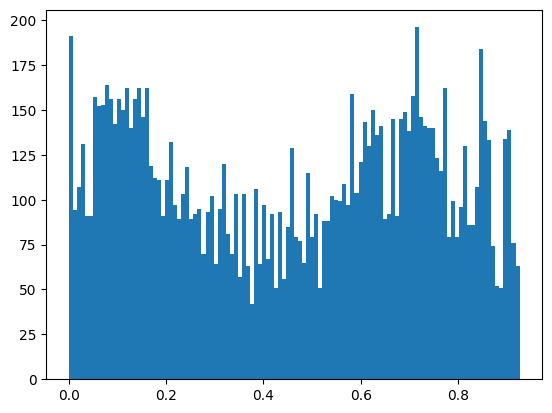

In [ ]:
y_totrain = array([cum_prob_temperature(i) for i in y_train])
y_totest = array([cum_prob_temperature(i) for i in y_test])

plt.hist(y_totrain, bins = round(sqrt(len(y_totrain))))
plt.show()

In [ ]:
pip install mrmr_selection

In [ ]:
from mrmr import mrmr_classif
mrmr = mrmr_classif(x_train, y_totrain, K = 50)

xtrain_mrmr = x_train[:,array(mrmr)]
xtest_mrmr = x_test[:,array(mrmr)]

AttributeError: ignored

In [ ]:
new = True
if 'nn_uniform_temperature.h5' in os.listdir(dir) and not new:
  model1 = keras.models.load_model(dir + 'nn_uniform_temperature.h5')
  print(model1.summary(),'\n')
else:
  model1 = Sequential([
          Dense(204, input_shape = (len(xtrain_mrmr[0]),)),
          Dense(180),
          Dense(70),
          Dense(20),
          Dense(1, activation='sigmoid')
  ])

  model1.compile(optimizer='adam', loss='mse', metrics = ['mae'])
  print(model1.summary(),'\n')

  history = model1.fit(xtrain_mrmr, y_totrain, epochs = 250, batch_size=32, validation_data=(xtest_mrmr, y_totest))
  model1.save(dir + 'nn_uniform_temperature.h5')

  plt.plot(range(4,251),history.history['loss'][3:])
  plt.plot(range(4,251),history.history['val_loss'][3:])
  plt.grid()
  plt.show()

def f1(material):
  x_mod = model1.predict(array([array(material)])).flatten()[0]
  return inv_cum_prob_temperature(x_mod)

In [ ]:
def root_mean_square_error(func):
  x = 0
  n = len(y_test)
  for i in range(n):
    try:
      x += (func(xtest_mrmr[i])-y_test.iloc[i])**2
    except:
      n = n - 1
  return sqrt(x/n)

In [ ]:
rmse1 = root_mean_square_error(f1)
print('RMSE:', rmse1)

### Neural Network com MinMax Scaler nas Temperaturas

In [ ]:
y_totrain2 = array(y_train).reshape(-1, 1)
y_totest2 = array(y_test).reshape(-1, 1)
y_totrain2, y_totest2 = log(y_totrain2), log(y_totest2)
scaler_temp = MinMaxScaler()
y_totrain2 = scaler_temp.fit(y_totrain2).transform(y_totrain2)
y_totest2 = scaler_temp.transform(y_totest2)

In [ ]:
new = False
if 'nn_uniform_temperature.h5' in os.listdir(dir) and not new:
  model2 = tf.keras.models.load_model(dir + 'nn_minmax_temperature.h5')
  print(model2.summary(),'\n')
else:
  model2 = Sequential([
          Dense(204, input_shape = (len(x_train[0]),)),
          Dense(180),
          Dense(70),
          Dense(20),
          Dense(1, activation='sigmoid')
  ])

  model2.compile(optimizer='adam', loss='mse', metrics = ['mae'])
  print(model2.summary(),'\n')

  history2 = model2.fit(x_train, y_totrain, epochs = 200, batch_size=32, validation_data=(x_test, y_totest))
  model2.save(dir + 'nn_uniform_temperature.h5')

  plt.plot(range(4,201),history2.history['loss'][3:])
  plt.plot(range(4,201),history2.history['val_loss'][3:])
  plt.grid()
  plt.show()

In [ ]:
def f2(material):
  return exp(scaler_temp.inverse_transform(model2.predict(array([array(material)])))[0,0])

rmse2 = root_mean_square_error(f2)
print('RMSE:', rmse2)

### Random Forest Regressor com MinMax Scaler para as Temperaturas

In [ ]:
new = False
if 'random_forest_model.pkl' in os.listdir(dir) and not new:
  rnd_forest_model = joblib.load(dir + 'random_forest_model.pkl')
else:
  start = time.clock()

  rnd_forest_model = RandomForestRegressor(max_depth = 10, criterion = 'mae', random_state = 0)
  rnd_forest_model.fit(x_train, y_totrain2.flatten())
  joblib.dump(rnd_forest_model, dir + 'random_forest_model.pkl')

  print('Time:', round(time.clock()-start),'s')

In [ ]:
def f_forest(material):
  return exp(scaler_temp.inverse_transform([rnd_forest_model.predict(array(material).reshape(1,-1))])[0,0])

rmse_forest = root_mean_square_error(f_forest)
print('RMSE:', rmse_forest)

### Random Forest Regressor com Uniform Scaler para as Temperaturas

In [ ]:
new = False
if 'random_forest_model2.pkl' in os.listdir(dir) and not new:
  rnd_forest_model2 = joblib.load(dir + 'random_forest_model2.pkl')
else:
  start = time.clock()

  rnd_forest_model2 = RandomForestRegressor(max_depth = 12, criterion = 'mae', random_state = 0)
  rnd_forest_model2.fit(x_train, y_totrain.flatten())
  joblib.dump(rnd_forest_model2, dir + 'random_forest_model2.pkl')

  print('Time:', round(time.clock()-start),'s')

In [ ]:
def f_forest2(material):
  x1 = (rnd_forest_model2.predict(array(material).reshape(1,-1))).flatten()[0]
  return inv_cum_prob_temperature(x1)

rmse_forest2 = root_mean_square_error(f_forest2)
print('RMSE:', rmse_forest2)

In [ ]:
i=0

In [ ]:
print('Material', i)
print('Real:', y_test.iloc[i])
print('Previsto:', f'{f_forest2(x_test[i]):.2f}')
i+=1

### Custom activation function

In [ ]:
len(data1.columns)

In [ ]:
def rand_dist(n=81):
  soma = 0
  for i in range(n):
    soma += random.uniform()*random.normal()
  return soma

def pdf_dist(rand_func = rand_dist, n_simulations = 10000, n=81):
  x = []
  for i in range(n_simulations):
    x.append(rand_func(n))
  return x

In [ ]:
stdd, varr = [], []
n_max = 9
num = list(range(n_max)) + [81,85,210,300]
for n in num:
  x = pdf_dist(n=n)
  stddd = std(x)
  stdd.append(stddd)
  varr.append(stddd**2)
plt.figure()
plt.plot(num,stdd,'o')
plt.plot(num,varr,'o')
plt.grid()
plt.show()

In [ ]:
a,b = linreg(num,varr)[:2]
print('a:', a)
print('b:', b)

In [ ]:
def custom_activation(x):
  x = x/sqrt(a*85)
  return keras.activations.gelu(x)/x

In [ ]:
l = []
for i in range(10000):
  l.append(custom_activation(rand_dist(n=85)))
plt.hist(l,bins=100)
plt.show()

### Uniformization of parameters

In [ ]:
class Parameter():
  def __init__(self, distribution):
    x = copy.deepcopy(distribution)
    x.sort()
    self.distribution = x
    self.minimo = x[0]
    self.maximo = x[-1]
    length = len(self.distribution)
    self.f = lin_interpol(self.distribution, linspace(0,1,length,endpoint=True))

  def cdf(self, x):
    if x > self.minimo and x<self.maximo:
      return self.f(x)
    elif x <= self.minimo:
      return 0
    else:
      return 1

In [ ]:
random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(data1, y, train_size = 0.8)
materials_train = x_train.index
materials_test = x_test.index
x_train

In [ ]:
parameters = dict()
for parameter in x_train.columns:
  parameters[parameter] = Parameter(array(x_train[parameter]))

In [ ]:
#Scaler para temperaturas

def scatter_hist(x, bins = None):
  if bins == None:
    bins = round(sqrt(len(x)))
  xmin = min(x)
  xmax = max(x)+std(x)/1000
  copy = [int((i-xmin)/(xmax-xmin)*bins) for i in x]
  bin = zeros(bins)
  for i in copy:
    bin[i] += 1
  deltax = (xmax-xmin)/bins
  xaxis = linspace(xmin+deltax/2,xmax-deltax/2,bins)
  return xaxis, array(bin)
'''
def curve(x,a,b,C):
  return C*exp(-a*x)*(0.5*cos(b*x)+1)
'''
def curve(x):
  C1,C2,a,mu,var = 1385,200,1/14.5,85,150
  return C1*exp(-a*x)+C2*exp(-pow(x-mu,2)/var)+100*exp(-0.01*x)

x_hist_temp, y_hist_temp = scatter_hist(y_train)
#x_hist_temp = x_hist_temp
#C1,C2,a,mu,var = curve_fit(curve,x_hist_temp.flatten(),y_hist_temp.flatten(),p0=[1200,200,1/14,85,150])[0]
#print('a:', a)
#print('b:', b)
#print('C:', C,'\n')

plt.plot(x_hist_temp, y_hist_temp, 'o')
plt.plot(linspace(min(x_hist_temp),max(x_hist_temp),100),[curve(i) for i in linspace(min(x_hist_temp),max(x_hist_temp),100)])
plt.xlabel('Temperatura (K)')
plt.grid()
plt.show()

def cum_prob_temperature(x):
  return integrate.quad(curve,0,x)[0]/integrate.quad(curve,0,inf)[0]

def inv_cum_prob_temperature(x):
  def find_zero_function(k):
    return cum_prob_temperature(k) - x
  sol = root_scalar(find_zero_function,bracket=[-400,600])
  return sol.root

plt.figure()
plt.plot(linspace(0,175,100),[cum_prob_temperature(i) for i in linspace(0,175,100)])
plt.title('Cumulative Probability Density Function')
plt.grid()
plt.show()

plt.figure()
plt.plot(linspace(0,0.97,100),[inv_cum_prob_temperature(i) for i in linspace(0,0.97,100)])
plt.grid()
plt.show()

In [ ]:
y_train = array([cum_prob_temperature(i) for i in y_train])
y_test = array([cum_prob_temperature(i) for i in y_test])

In [ ]:
for parameter in data1.columns:
  x_train[parameter] = array([parameters[parameter].cdf(i) for i in array(x_train[parameter])])
  x_test[parameter] = array([parameters[parameter].cdf(i) for i in array(x_test[parameter])])
x_train

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size = 0.5)

### Neural network

In [ ]:
uniform_model = Sequential([Dense(81,input_shape=(81,),kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.Zeros(),activation=custom_activation)])
for i in range(6):
  uniform_model.add(Dense(81,kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.Zeros(),activation=custom_activation))
uniform_model.add(Dense(1,kernel_initializer=keras.initializers.RandomNormal(stddev=1),bias_initializer=keras.initializers.Zeros(),activation=custom_activation))

uniform_model.compile(optimizer='adam', loss='mse', metrics = ['mae'])
print(uniform_model.summary())

In [ ]:
uniform_model.fit(x_train,y_train,epochs=200,batch_size=32,validation_data=(x_val,y_val))

In [ ]:
def root_mean_square_error(func):
  x = 0
  n = len(y_test)
  for i in range(n):
    try:
      x += (func(x_test.iloc[i])-inv_cum_prob_temperature(y_test[i]))**2
    except:
      n = n - 1
  return sqrt(x/n)

def f_uniform(material):
  x_mod = uniform_model.predict(array(material).reshape(1,-1)).flatten()[0]
  return inv_cum_prob_temperature(x_mod)

In [ ]:
root_mean_square_error(f_uniform)

In [ ]:
i+=10
print(inv_cum_prob_temperature(y_test[i]))
print(f_uniform(x_test.iloc[i]))

In [ ]:
uniform_model.save_weights(dir + 'uniform_model.h5')

### Grouping of materials

In [ ]:
composition_train = x_train.iloc[:,list(x_train.columns).index('H'):]
composition_test = x_test.iloc[:,list(x_test.columns).index('H'):]

In [ ]:
clusters = []

model = KMeans(n_clusters = 6)
model.fit(composition_train)

x_train['Group'] = model.labels_
x_train = x_train.iloc[argsort(model.labels_),:]
y_train = y_train.iloc[argsort(model.labels_)]

x_test['Group'] = model.predict(composition_test)

x_train

### Power law regression of positive continuous variables and fitting of residuals with random forest

In [ ]:
lista = array(x_train.columns[:81])
basics = array([i for i in lista if min(x_train[i]) > 0][1:])
print(basics)

['mean_atomic_mass' 'wtd_mean_atomic_mass' 'gmean_atomic_mass'
 'wtd_gmean_atomic_mass' 'mean_fie' 'wtd_mean_fie' 'gmean_fie'
 'wtd_gmean_fie' 'mean_atomic_radius' 'wtd_mean_atomic_radius'
 'gmean_atomic_radius' 'wtd_gmean_atomic_radius' 'mean_Density'
 'wtd_mean_Density' 'gmean_Density' 'wtd_gmean_Density'
 'mean_ElectronAffinity' 'wtd_mean_ElectronAffinity'
 'gmean_ElectronAffinity' 'wtd_gmean_ElectronAffinity' 'mean_FusionHeat'
 'wtd_mean_FusionHeat' 'gmean_FusionHeat' 'wtd_gmean_FusionHeat'
 'mean_ThermalConductivity' 'wtd_mean_ThermalConductivity'
 'gmean_ThermalConductivity' 'wtd_gmean_ThermalConductivity'
 'mean_Valence' 'wtd_mean_Valence' 'gmean_Valence' 'wtd_gmean_Valence']


In [ ]:
x_log = log(x_train[basics])
y_log = log(y_train)

from sklearn.linear_model import LinearRegression
res = LinearRegression()
res.fit(x_log,y_log)
print('Coefficients:', res.coef_)
print('Intercept:', res.intercept_)
print('r^2:', res.score(x_log,y_log))
print('mae:', mean(abs(exp(y_log)-exp(res.predict(x_log)))))

Coefficients: [  2.31403329  -2.47468267  -0.69136595   1.09068972 -11.94404159
  14.82852662  12.9009965  -18.29153839   7.45584377   6.20659508
  -9.26311174  -3.88046983  -1.60662514   0.96133078   0.33357517
  -0.2391801   -0.28388346   1.02067349  -0.11766269  -1.03851065
  -0.1020252   -0.57268568  -0.49437127   1.46138708  -0.34864175
   0.98510747   0.46351154  -1.00964255   1.06871662  -0.69735495
  -0.89523066   0.13550696]
Intercept: 19.597596169643055
r^2: 0.620240870399422
mae: 15.276042257455257


In [ ]:
def x_residual(df):
  copia = df.copy()
  copia[basics] = log(copia[basics])
  return copia

xtrain_residuals = x_residual(x_train)
xtest_residuals = x_residual(x_test)

y_residual = y_train - exp(res.predict(x_log))
y_val = y_test - exp(res.predict(log(x_test)[basics]))

scaler = MinMaxScaler()
xtrain_residuals = scaler.fit_transform(xtrain_residuals)
xtest_residuals = scaler.transform(xtest_residuals)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [ ]:
model_residuals = RandomForestRegressor(n_estimators = 100,  max_depth = 50, max_features = 'sqrt')
model_residuals.fit(xtrain_residuals, y_residual)

RandomForestRegressor(max_depth=50, max_features='sqrt')

In [ ]:
y_pred = exp(res.predict(log(x_test)[basics])) + model_residuals.predict(xtest_residuals)

print('mae:', mean(abs(y_test-y_pred)))
print('mse:', sqrt(mean(pow(y_test-y_pred,2))))

mae: 5.579305543486329
mse: 9.72888212923977


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [ ]:
sum([tree.tree_.node_count for tree in model_residuals.estimators_])*5

7785470

In [ ]:
xxx = pow(array(xtrain_residuals.iloc[:,1:81].corr()),2)


clusters = []
for i in range(2,30):
  model = KMeans(n_clusters = i)
  model.fit(xxx)
  clusters.append(model.inertia_)
plt.plot(range(2,30),clusters)
plt.show()

model = KMeans(n_clusters = 3)
model.fit(xxx)

xxx = pow(array(xtrain_residuals.iloc[:,argsort(model.labels_)+1].corr()),2)

plt.figure()
plt.pcolor(xxx)
plt.colorbar()
plt.show()

In [ ]:
ytrain_pred = model_residuals2.predict(xtrain_residuals)
ytrain_pred = levy_stable.ppf(y_pred, alpha, beta, mu, c)

In [ ]:
xtrain_residuals.iloc[:,1:81]
scaler = StandardScaler()
scaled = scaler.fit_transform(xtrain_residuals)

pca = PCA(n_components = 42)
scaled = pca.fit_transform(scaled)

y_resres = y_test - y_preds

modelresres = RandomForestRegressor(n_estimators = 50,  max_depth = 20, max_features = 'sqrt')


### Autoencoder

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
pd.DataFrame(x_train)

In [ ]:
def val_loss(n_features, epochs = 10):
  len_input = x_train.shape[1]
  n1 = round(sqrt(n_features*len_input))

  encoder = Sequential([
        Dense(n1, input_shape=(len_input,),activation='linear', kernel_regularizer=tf.keras.regularizers.L1(0.02)),
        Dense(n_features, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L1(0.02))
  ])

  decoder = Sequential([
        Dense(n1, input_shape = (n_features,), activation='relu'),
        Dense(len_input, activation='sigmoid')
  ])

  autoencoder = Sequential([
        encoder,
        decoder
  ])
  autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

  history = autoencoder.fit(x_train,x_train,epochs=epochs,batch_size=16,validation_data=(x_test,x_test),verbose=0)

  return encoder, decoder, autoencoder, history.history['val_mae'][-1]

In [ ]:
len_input = x_train.shape[1]

x = unique(logspace(log10(1),log10(len_input-1),25).astype(int))
print(x)
l = []
encoder, decoder, autoencoder, loss = val_loss(5, epochs = 30)
print(loss)
# for i in x[:3]:
#   print(f'{i} features')
#   l.append(val_loss(i, epochs = 100))

# plt.plot(x,l)
# plt.grid()
# plt.xlabel('Number of features')
# plt.ylabel('Val Loss')
# plt.show()

In [ ]:
hhh= array(y_train)
ind = where(hhh>70)

mask = ones(x.size, dtype=bool)
mask[ind] = False

plt.plot(x[mask],y[mask],'.')
plt.plot(x[ind],y[ind],'.')

In [ ]:
model = RandomForestRegressor(n_estimators = 300)

model.fit(encoder.predict(x_train), y_train)

y_pred = model.predict(encoder.predict(x_test))

print('mae:', mean(abs(y_test-y_pred)))
print('mse:', sqrt(mean(pow(y_test-y_pred,2))))